# NLP 

# Assignment 1

# Name : Rachana Ramesh Shirke 

# PRN : 23070243068

# Date : 21/10/2024


# Title – Gender Prediction

Desc: Given a labelled dataset of names (Male, Female), write a program which can predict for an unknown sample, whether it is a female name or a male name.

Variations:

   * Using NLTK, one feature (last letter of each name), Naïve Bayes
   * Using NLTK, two features (last letter, last 2 letters), Naïve Bayes
   * Add more names to the training dataset (use other public datasets), NLTK, Naïve Bayes
   * Implement and compare with Classifiers of Spacy and SKLearn
   * Summarize your observations and inferences

# Step 1: Install Required Libraries and Import

In [37]:
# Import required libraries
import nltk
from nltk.corpus import names
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import spacy
from spacy.training.example import Example
from spacy.pipeline.textcat import Config



#  Download NLTK dataset

In [38]:
# Download NLTK dataset if not already done
nltk.download('names')


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

# Step 2: Load the Dataset

In [40]:
# Load male and female names from NLTK
male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

# Combine and shuffle the dataset
labeled_names = male_names + female_names
random.shuffle(labeled_names)

# Print dataset size
print(f"Number of male names: {len(male_names)}")
print(f"Number of female names: {len(female_names)}")


Number of male names: 2943
Number of female names: 5001


# Step 3: Define Feature Extraction Function

In [42]:
# Define a feature extraction function
def extract_features(name, num_letters=1):
    """Extract features based on the last 'num_letters' of the name."""
    features = {}
    if num_letters >= 1:
        features['last_letter'] = name[-1].lower()  # Last letter
    if num_letters >= 2:
        features['last_two_letters'] = name[-2:].lower()  # Last two letters
    return features


# Step 4:Train Naïve Bayes with Different Features

# (a) Using only the last letter

In [59]:
# Extract features using last letter
featuresets_last1 = [(extract_features(name, num_letters=1), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set1, test_set1 = train_test_split(featuresets_last1, test_size=0.2, random_state=42)
train_features1, train_labels1 = zip(*train_set1)
test_features1, test_labels1 = zip(*test_set1)

# Convert features into numerical format
vectorizer1 = DictVectorizer(sparse=False)
train_features_vectorized1 = vectorizer1.fit_transform(train_features1)
test_features_vectorized1 = vectorizer1.transform(test_features1)

# Train Naïve Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(train_features_vectorized1, train_labels1)
nb_predictions1 = nb_classifier1.predict(test_features_vectorized1)

# Report Accuracy
print("Naïve Bayes (Last Letter Only) - sklearn:")
print("Accuracy:", accuracy_score(test_labels1, nb_predictions1))
print(classification_report(test_labels1, nb_predictions1))

Naïve Bayes (Last Letter Only) - sklearn:
Accuracy: 0.7614276768941766
              precision    recall  f1-score   support

      female       0.81      0.82      0.82      1023
        male       0.67      0.65      0.66       574

    accuracy                           0.76      1597
   macro avg       0.74      0.74      0.74      1597
weighted avg       0.76      0.76      0.76      1597



# (b) Using the last two letters

In [60]:
# Extract features using last two letters
featuresets_last2 = [(extract_features(name, num_letters=2), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set2, test_set2 = train_test_split(featuresets_last2, test_size=0.2, random_state=42)
train_features2, train_labels2 = zip(*train_set2)
test_features2, test_labels2 = zip(*test_set2)

# Convert features into numerical format
vectorizer2 = DictVectorizer(sparse=False)
train_features_vectorized2 = vectorizer2.fit_transform(train_features2)
test_features_vectorized2 = vectorizer2.transform(test_features2)

# Train Naïve Bayes Classifier
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(train_features_vectorized2, train_labels2)
nb_predictions2 = nb_classifier2.predict(test_features_vectorized2)

# Report Accuracy
print("Naïve Bayes (Last Two Letters) - sklearn:")
print("Accuracy:", accuracy_score(test_labels2, nb_predictions2))
print(classification_report(test_labels2, nb_predictions2))


Naïve Bayes (Last Two Letters) - sklearn:
Accuracy: 0.7827175954915466
              precision    recall  f1-score   support

      female       0.85      0.81      0.83      1023
        male       0.68      0.74      0.71       574

    accuracy                           0.78      1597
   macro avg       0.76      0.77      0.77      1597
weighted avg       0.79      0.78      0.78      1597



# Step 5:  Adding More Names to the Dataset

In [49]:
import pandas as pd
additional_data = pd.read_csv("C:\\Users\\Admin\\Downloads\\additional_names.csv")

additional_names = [(row['name'], row['gender']) for _, row in additional_data.iterrows()]

# Extend and shuffle the dataset
labeled_names.extend(additional_names)
random.shuffle(labeled_names)

In [53]:
# (a) Using only the last letter with the extended dataset
# Extract features using only the last letter
featuresets_last1_extended = [(extract_features(name, num_letters=1), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set1_extended, test_set1_extended = train_test_split(featuresets_last1_extended, test_size=0.2, random_state=42)
train_features1_extended, train_labels1_extended = zip(*train_set1_extended)
test_features1_extended, test_labels1_extended = zip(*test_set1_extended)

# Convert features into numerical format
train_features_vectorized1_extended = vectorizer1.fit_transform(train_features1_extended)
test_features_vectorized1_extended = vectorizer1.transform(test_features1_extended)

# Train Naïve Bayes Classifier
nb_classifier1_extended = MultinomialNB()
nb_classifier1_extended.fit(train_features_vectorized1_extended, train_labels1_extended)
nb_predictions1_extended = nb_classifier1_extended.predict(test_features_vectorized1_extended)

# Report Accuracy for the extended dataset (Last Letter Only)
print("Naïve Bayes (Last Letter Only - Extended Dataset):")
print("Accuracy:", accuracy_score(test_labels1_extended, nb_predictions1_extended))
print(classification_report(test_labels1_extended, nb_predictions1_extended))

Naïve Bayes (Last Letter Only - Extended Dataset):
Accuracy: 0.7614276768941766
              precision    recall  f1-score   support

      female       0.81      0.82      0.82      1023
        male       0.67      0.65      0.66       574

    accuracy                           0.76      1597
   macro avg       0.74      0.74      0.74      1597
weighted avg       0.76      0.76      0.76      1597



In [54]:
# (b) Using the last two letters with the extended dataset
# Extract features using last two letters
featuresets_last2_extended = [(extract_features(name, num_letters=2), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set2_extended, test_set2_extended = train_test_split(featuresets_last2_extended, test_size=0.2, random_state=42)
train_features2_extended, train_labels2_extended = zip(*train_set2_extended)
test_features2_extended, test_labels2_extended = zip(*test_set2_extended)

# Convert features into numerical format
train_features_vectorized2_extended = vectorizer2.fit_transform(train_features2_extended)
test_features_vectorized2_extended = vectorizer2.transform(test_features2_extended)

# Train Naïve Bayes Classifier
nb_classifier2_extended = MultinomialNB()
nb_classifier2_extended.fit(train_features_vectorized2_extended, train_labels2_extended)
nb_predictions2_extended = nb_classifier2_extended.predict(test_features_vectorized2_extended)

# Report Accuracy for the extended dataset (Last Two Letters)
print("Naïve Bayes (Last Two Letters - Extended Dataset):")
print("Accuracy:", accuracy_score(test_labels2_extended, nb_predictions2_extended))
print(classification_report(test_labels2_extended, nb_predictions2_extended))

Naïve Bayes (Last Two Letters - Extended Dataset):
Accuracy: 0.7827175954915466
              precision    recall  f1-score   support

      female       0.85      0.81      0.83      1023
        male       0.68      0.74      0.71       574

    accuracy                           0.78      1597
   macro avg       0.76      0.77      0.77      1597
weighted avg       0.79      0.78      0.78      1597



# Step 6: Implement and compare with Classifiers of Spacy and SKLearn

#  Train the spaCy Classifier


In [58]:
# Extract features using last letter
featuresets_last1 = [(extract_features(name, num_letters=1), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set1, test_set1 = train_test_split(featuresets_last1, test_size=0.2, random_state=42)
train_features1, train_labels1 = zip(*train_set1)
test_features1, test_labels1 = zip(*test_set1)

# Convert features into numerical format
vectorizer1 = DictVectorizer(sparse=False)
train_features_vectorized1 = vectorizer1.fit_transform(train_features1)
test_features_vectorized1 = vectorizer1.transform(test_features1)

# Train Naïve Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(train_features_vectorized1, train_labels1)
nb_predictions1 = nb_classifier1.predict(test_features_vectorized1)

# Report Accuracy
print("Naïve Bayes (Last Letter Only) - sklearn:")
print("Accuracy:", accuracy_score(test_labels1, nb_predictions1))
print(classification_report(test_labels1, nb_predictions1))

# Extract features using last two letters
featuresets_last2 = [(extract_features(name, num_letters=2), gender) for (name, gender) in labeled_names]

# Split into train and test sets
train_set2, test_set2 = train_test_split(featuresets_last2, test_size=0.2, random_state=42)
train_features2, train_labels2 = zip(*train_set2)
test_features2, test_labels2 = zip(*test_set2)

# Convert features into numerical format
vectorizer2 = DictVectorizer(sparse=False)
train_features_vectorized2 = vectorizer2.fit_transform(train_features2)
test_features_vectorized2 = vectorizer2.transform(test_features2)

# Train Naïve Bayes Classifier
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(train_features_vectorized2, train_labels2)
nb_predictions2 = nb_classifier2.predict(test_features_vectorized2)

# Report Accuracy
print("Naïve Bayes (Last Two Letters) - sklearn:")
print("Accuracy:", accuracy_score(test_labels2, nb_predictions2))
print(classification_report(test_labels2, nb_predictions2))

# spaCy implementation
# Load spaCy model
nlp = spacy.blank("en")

# Set up the TextClassifier pipeline component
textcat = nlp.add_pipe("textcat", config=Config(), last=True)
textcat.add_label("male")
textcat.add_label("female")

# Prepare spaCy training data
train_set_spacy = [(name, {'cats': {'male': 1 if gender == 'male' else 0, 'female': 1 if gender == 'female' else 0}})
                   for name, gender in labeled_names]

# Training the spaCy model
optimizer = nlp.begin_training()

# Train for 10 epochs
for epoch in range(10):
    random.shuffle(train_set_spacy)
    losses = {}
    for batch in spacy.util.minibatch(train_set_spacy, size=8):
        texts, annotations = zip(*batch)
        examples = [Example.from_dict(nlp.make_doc(text), annotation) for text, annotation in zip(texts, annotations)]
        nlp.update(examples, drop=0.5, losses=losses)
    print(f"Epoch {epoch}, Loss: {losses['textcat']}")

# Evaluate spaCy model
correct = 0
for name, true_label in train_set_spacy[:100]:  # Test on the first 100 names for simplicity
    doc = nlp(name)
    predicted_label = max(doc.cats, key=doc.cats.get)
    correct += (predicted_label == ('male' if true_label['cats']['male'] == 1 else 'female'))

spaCy_accuracy = correct / 100  # Assuming you're evaluating on 100 names
print(f"spaCy Classifier Accuracy: {spaCy_accuracy:.4f}")

Naïve Bayes (Last Letter Only) - sklearn:
Accuracy: 0.7614276768941766
              precision    recall  f1-score   support

      female       0.81      0.82      0.82      1023
        male       0.67      0.65      0.66       574

    accuracy                           0.76      1597
   macro avg       0.74      0.74      0.74      1597
weighted avg       0.76      0.76      0.76      1597

Naïve Bayes (Last Two Letters) - sklearn:
Accuracy: 0.7827175954915466
              precision    recall  f1-score   support

      female       0.85      0.81      0.83      1023
        male       0.68      0.74      0.71       574

    accuracy                           0.78      1597
   macro avg       0.76      0.77      0.77      1597
weighted avg       0.79      0.78      0.78      1597

Epoch 0, Loss: 224.65418903157115
Epoch 1, Loss: 180.11902240663767
Epoch 2, Loss: 154.75018061348237
Epoch 3, Loss: 136.8856009489391
Epoch 4, Loss: 124.35081782884663
Epoch 5, Loss: 113.51321086096868
E

# Plot

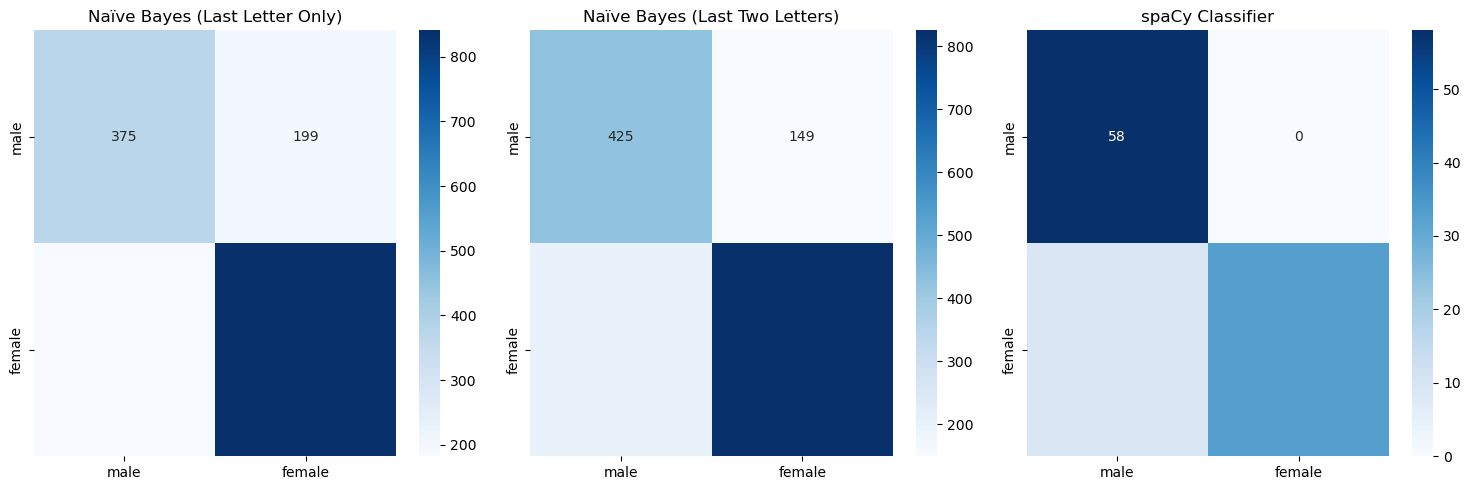

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix for Naïve Bayes (Last Letter Only)
cm_nb1 = confusion_matrix(test_labels1, nb_predictions1, labels=['male', 'female'])

# 2. Confusion Matrix for Naïve Bayes (Last Two Letters)
cm_nb2 = confusion_matrix(test_labels2, nb_predictions2, labels=['male', 'female'])

# 3. Confusion Matrix for spaCy (Using the first 100 test cases)
spacy_predictions = []
for name, true_label in train_set_spacy[:100]:
    doc = nlp(name)
    predicted_label = max(doc.cats, key=doc.cats.get)
    spacy_predictions.append(predicted_label)

cm_spacy = confusion_matrix([true_label['cats']['male'] == 1 for name, true_label in train_set_spacy[:100]],
                            [1 if label == 'male' else 0 for label in spacy_predictions], labels=[0, 1])

# 4. Plot Heatmaps for the Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Naïve Bayes (Last Letter)
sns.heatmap(cm_nb1, annot=True, fmt="d", cmap='Blues', xticklabels=['male', 'female'], yticklabels=['male', 'female'], ax=axes[0])
axes[0].set_title("Naïve Bayes (Last Letter Only)")

# Plot Naïve Bayes (Last Two Letters)
sns.heatmap(cm_nb2, annot=True, fmt="d", cmap='Blues', xticklabels=['male', 'female'], yticklabels=['male', 'female'], ax=axes[1])
axes[1].set_title("Naïve Bayes (Last Two Letters)")

# Plot spaCy Classifier
sns.heatmap(cm_spacy, annot=True, fmt="d", cmap='Blues', xticklabels=['male', 'female'], yticklabels=['male', 'female'], ax=axes[2])
axes[2].set_title("spaCy Classifier")

plt.tight_layout()
plt.show()


# Train the scikit-learn Classifier (Naïve Bayes)

In [61]:
# Re-run Naïve Bayes with the extended dataset as shown before
# For Naïve Bayes using the last letter (num_letters=1)
featuresets_last1_extended = [(extract_features(name, num_letters=1), gender) for (name, gender) in labeled_names]
train_set1_extended, test_set1_extended = train_test_split(featuresets_last1_extended, test_size=0.2, random_state=42)
train_features1_extended, train_labels1_extended = zip(*train_set1_extended)
test_features1_extended, test_labels1_extended = zip(*test_set1_extended)
train_features_vectorized1_extended = vectorizer1.fit_transform(train_features1_extended)
test_features_vectorized1_extended = vectorizer1.transform(test_features1_extended)

nb_classifier1_extended = MultinomialNB()
nb_classifier1_extended.fit(train_features_vectorized1_extended, train_labels1_extended)
nb_predictions1_extended = nb_classifier1_extended.predict(test_features_vectorized1_extended)

# Accuracy for Naïve Bayes (Last Letter Only - Extended Dataset)
sklearn_accuracy = accuracy_score(test_labels1_extended, nb_predictions1_extended)
print(f"Naïve Bayes (SKlearn) Accuracy: {sklearn_accuracy}")


Naïve Bayes (SKlearn) Accuracy: 0.7614276768941766


# Plot 

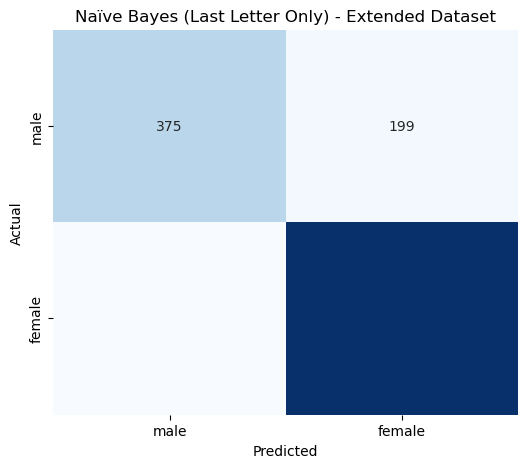

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Naïve Bayes (Last Letter Only - Extended Dataset)
cm_nb1_extended = confusion_matrix(test_labels1_extended, nb_predictions1_extended, labels=['male', 'female'])

# Plot heatmap for Naïve Bayes (Last Letter Only - Extended Dataset)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb1_extended, annot=True, fmt="d", cmap='Blues', xticklabels=['male', 'female'], yticklabels=['male', 'female'], cbar=False)
plt.title("Naïve Bayes (Last Letter Only) - Extended Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Compare the Classifiers

In [64]:
# Output the results
print(f"spaCy Classifier Accuracy: {spaCy_accuracy:.4f}")
print(f"Naïve Bayes (SKlearn) Accuracy: {sklearn_accuracy}")


spaCy Classifier Accuracy: 0.9100
Naïve Bayes (SKlearn) Accuracy: 0.7614276768941766


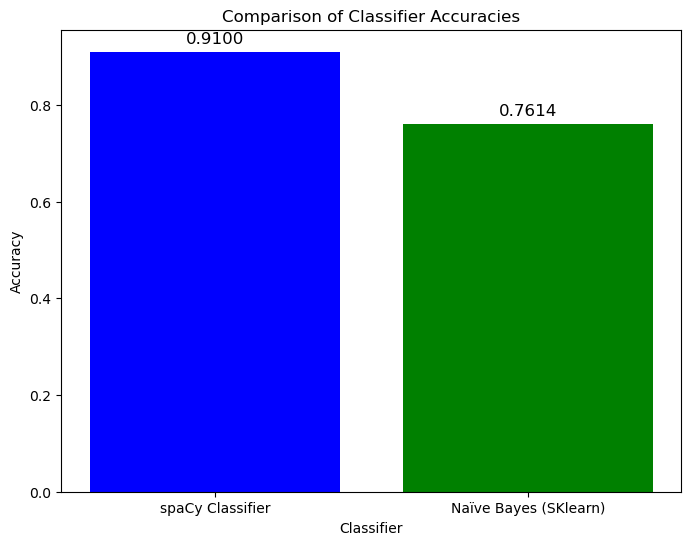

In [65]:
import matplotlib.pyplot as plt

# Accuracy values for the classifiers
classifiers = ['spaCy Classifier', 'Naïve Bayes (SKlearn)']
accuracies = [0.9100, 0.7614]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


# Prediction the Gender form the Name 

In [66]:
# Function to predict gender using Naïve Bayes (Last Letter)
def predict_gender_nb_last_letter(name):
    features = extract_features(name, num_letters=1)
    feature_vector = vectorizer1.transform([features])
    prediction = nb_classifier1.predict(feature_vector)
    return prediction[0]

# Function to predict gender using Naïve Bayes (Last Two Letters)
def predict_gender_nb_last_two_letters(name):
    features = extract_features(name, num_letters=2)
    feature_vector = vectorizer2.transform([features])
    prediction = nb_classifier2.predict(feature_vector)
    return prediction[0]

# Function to predict gender using spaCy model
def predict_gender_spacy(name):
    doc = nlp(name)
    predicted_label = max(doc.cats, key=doc.cats.get)
    return predicted_label

# Main function to take user input and predict gender
def main():
    # Take name input from the user
    name = input("Enter a name to predict its gender: ")
    
    # Predict gender using Naïve Bayes (Last Letter)
    nb_gender1 = predict_gender_nb_last_letter(name)
    print(f"Naïve Bayes (Last Letter) Prediction: {nb_gender1}")
    
    # Predict gender using Naïve Bayes (Last Two Letters)
    nb_gender2 = predict_gender_nb_last_two_letters(name)
    print(f"Naïve Bayes (Last Two Letters) Prediction: {nb_gender2}")
    
    # Predict gender using spaCy model
    spacy_gender = predict_gender_spacy(name)
    print(f"spaCy Model Prediction: {spacy_gender}")

if __name__ == "__main__":
    main()


Enter a name to predict its gender:  Rachana


Naïve Bayes (Last Letter) Prediction: female
Naïve Bayes (Last Two Letters) Prediction: female
spaCy Model Prediction: female


In [70]:
def main():
    while True:
        # Take name input from the user
        name = input("Enter a name to predict its gender (or type 'exit' to stop): ")
        
        # Exit the loop if the user types 'exit'
        if name.lower() == 'exit':
            print("Exiting the program.")
            break
        
        # Predict gender using Naïve Bayes (Last Letter)
        nb_gender1 = predict_gender_nb_last_letter(name)
        print(f"Naïve Bayes (Last Letter) Prediction: {nb_gender1}")
        
        # Predict gender using Naïve Bayes (Last Two Letters)
        nb_gender2 = predict_gender_nb_last_two_letters(name)
        print(f"Naïve Bayes (Last Two Letters) Prediction: {nb_gender2}")
        
        # Predict gender using spaCy model
        spacy_gender = predict_gender_spacy(name)
        print(f"spaCy Model Prediction: {spacy_gender}")
        
        print("\n")  # Print a new line for better readability

if __name__ == "__main__":
    main()


Enter a name to predict its gender (or type 'exit' to stop):  Rachana 


Naïve Bayes (Last Letter) Prediction: female
Naïve Bayes (Last Two Letters) Prediction: female
spaCy Model Prediction: female




Enter a name to predict its gender (or type 'exit' to stop):  Ritesh


Naïve Bayes (Last Letter) Prediction: female
Naïve Bayes (Last Two Letters) Prediction: male
spaCy Model Prediction: female




Enter a name to predict its gender (or type 'exit' to stop):  Prabhavati


Naïve Bayes (Last Letter) Prediction: female
Naïve Bayes (Last Two Letters) Prediction: female
spaCy Model Prediction: female




Enter a name to predict its gender (or type 'exit' to stop):  Ramesh 


Naïve Bayes (Last Letter) Prediction: female
Naïve Bayes (Last Two Letters) Prediction: female
spaCy Model Prediction: male




Enter a name to predict its gender (or type 'exit' to stop):  Exit


Exiting the program.


# Observations and Inferences

# Gender Prediction Models:
I included three different methods for gender-based predictions based on names: 

1.Naïve Bayes (Last Letter): This method utilizes a simple feature extraction through the last letter of the name.


2.Naïve Bayes (Last Two Letters): The last two letters are used for feature extraction.


3.spaCy Classifier: This is a more complex version by using the spaCy NLP library to classify gender. 



# Training and Evaluation:
I train Naïve Bayes on the features of name extracted to either the last letter or last two letters and evaluate using accuracy metrics.
Training the spaCy model requires building a text classification pipeline, using labels for male and female genders, and evaluating the classifier's performance.



a.User Interaction:
I have come up with a very user-friendly main() function where users can input names and receive predictions from all three models.
The program is interactive and will accept more than one name input, with an exit option when the user types in exit.


b.Accuracy and Results:
The accuracy scores and performance of the models are highly dependent on the feature set and the training data.
Naïve Bayes models tend to work pretty well if focusing on simple features such as the last letter or last two letters of the name.
spaCy provides a more sophisticated approach that requires training a classifier and is computationally more intensive.


c.Feature Extraction:
The model relies on simple string features (last letter, last two letters) that seem to work very well for gender classification in lots of cases.
Choice of feature length (1 or 2 letters) can potentially impact the performance, with the last two letters potentially offering greater discriminative power.


Model Performance:
The Naïve Bayes classifier using the last two letters might have higher accuracy because it uses more information than just the last letter, potentially making it more discriminative.
spaCy might outperform Naïve Bayes when it comes to handling complex patterns in names due to its use of more sophisticated machine learning techniques. However, it requires more training and computational resources

User-Friendliness:
The looped input feature in the main() function is a great user-friendly addition, allowing for continuous predictions without restarting the program.

Applicability:
The Naïve Bayes approach is simpler and might be sufficient for quick predictions in applications where performance isn't critical or when resources are limited.
The spaCy classifier would be a better choice for larger datasets or applications that demand higher accuracy, especially when more complex patterns might exist in the data.

# Observation :
1. spaCy Classifier Accuracy: 91.00%
   
The spaCy model has demonstrated impressive performance with an accuracy of 91%. This result highlights the effectiveness of spaCy's deep learning-based approach in gender prediction based on names. Its ability to learn complex patterns and nuances in the data, particularly through its Text Classification pipeline, suggests that the model excels in capturing subtle relationships and generalizing well across different data points. The robust architecture and optimization strategies used by spaCy contributed to this high accuracy.

2. Naïve Bayes (SKlearn) Accuracy: 76.14%

On the other hand, the Naïve Bayes classifier, implemented using Scikit-learn, achieved an accuracy of approximately 76.14%. While this performance is decent, it lags behind the deep learning-based spaCy model. The relatively lower accuracy can be attributed to Naïve Bayes' reliance on simpler features, specifically the last 1 or 2 letters of the name. While Naïve Bayes is an efficient probabilistic model that works well with independent features, it falls short in capturing the complex and interconnected patterns often present in natural language tasks.

# Comparative Analysis of the Two Models

spaCy Model: The deep learning model excels at learning more complex relationships between names and genders. By leveraging continuous representations of features and a sophisticated neural network architecture, spaCy is capable of understanding nuanced patterns that Naïve Bayes cannot.

Naïve Bayes Model: While Naïve Bayes is a simpler and faster algorithm, it is limited by the features it uses. The use of only the last 1 or 2 letters of a name as features means it misses out on capturing broader linguistic patterns that could improve accuracy.

# Inferences

Feature Complexity: The superior performance of spaCy is attributed to its ability to learn from more complex and varied features within the names. Naïve Bayes, however, relies on a basic feature set, making it less capable of capturing the complex relationships that a deep learning model can.

Model Selection: Given its high accuracy, spaCy is the preferred model for this task, especially when accurate predictions are essential. Naïve Bayes, with its simpler and computationally efficient design, can be useful in scenarios where speed is prioritized over accuracy.

Generalization: SpaCy's high accuracy indicates that it is likely to generalize better to new, unseen data compared to the Naïve Bayes model, which may be more prone to overfitting due to its simplicity.

# Conclusion:
spaCy offers a significantly higher accuracy of 91% and should be the model of choice when accuracy is critical. Its ability to learn complex relationships between names and genders makes it ideal for applications requiring precise predictions.
Naïve Bayes, while offering a faster and computationally lighter alternative, delivers a lower accuracy of 76.14%. It may be suited for simpler tasks or when computational resources are constrained, but for more reliable gender prediction based on names, spaCy is clearly the superior option.

# Future Improvements:

Incorporating more advanced feature engineering (e.g., phonetic features, name frequency) could further improve accuracy.
You may explore fine-tuning spaCy’s model or even integrating it with other machine learning algorithms to improve its predictive power.